Universidade Estadual Paulista - UNESP

Programa de Pós-Graduação em Ciência da Computação

**Processamento de Imagens Digitais**

Professor Leandro Alves Neves

Alunos: 
* Giovanna Carreira Marinho;
* Guilherme Francisco de Andrade Campos;
* Julia Rodrigues Gubolin;
* Thales Ricardo de Souza Lopes.

**Aula 11 - Representação, descrição e análise de textura**

Construa um código para receber imagens monocromáticas como
entrada, 8 bits de quantização. O código deve ser capaz de fornecer os
valores de:
- Haralick, com segundo momento angular, entropia e contraste. Use d=1 e $\theta$=0;
- Dimensão fractal (DF), usando Box-couting. A DF deve ser definida via coeficiente angular da regressão log x log. Os dois primeiros valores parciais de DF, em função das iterações 1 e 2, também devem ser apresentados.
Os descritores devem ser organizados como vetores de características,
respeitando a ordem posicional: momento angular, entropia, contraste, DF (coeficiente logxlog) e DF iteração 1 e DF iteração 2.

Apresente os vetores para cada imagem. As imagens são apresentadas nos próximos slides. Em seguida, observe os resultados numéricos e indique quais descritores apresentam as maiores diferenças para separar as imagens R0 de R3. Apresente os gráficos para ilustrar as posições espaciais dos descritores. Por exemplo, eixo x representa momento angular, eixo y a entropia e eixo z o contraste. Use a mesma estratégia para DF. Cada imagem é um ponto espacial em função das suas coordenadas/descritores.

In [ ]:
import numpy as np
import skimage.feature
import skimage.color
from skimage.io import imread, imshow
from skimage.util import img_as_uint
import matplotlib.pyplot as plt
from skimage.filters import rank
from mpl_toolkits import mplot3d

# Definindo função da Dimensão Fractal

In [ ]:
def fractal_dimension(Z, threshold=0.9):
    assert(len(Z.shape) == 2)
    # https://github.com/rougier/numpy-100
    def boxcount(Z, k):
        S = np.add.reduceat(
            np.add.reduceat(Z, np.arange(0, Z.shape[0], k), axis=0),
                               np.arange(0, Z.shape[1], k), axis=1)

        # desconsiderando "boxes" vazias e totalmente escuras;
        return len(np.where((S > 0) & (S < k*k))[0])


    # Transfomando a entrada em um array binário
    Z = (Z < threshold)

    # Buscando a menor dimensão da imagem
    p = min(Z.shape)

    # A menor potência de 2 menor ou igual a p
    n = 2**np.floor(np.log(p)/np.log(2))
    
    # Buscando o expoente
    n = int(np.log(n)/np.log(2))

    # Criando tamanhos de boxes sucessivas (2**n até 2**1)
    sizes = 2**np.arange(n, 1, -1)


    # Calculando a box de interação atual
    counts = []
    for size in sizes:
        counts.append(boxcount(Z, size))
      
    # Calculando as 2 primeiras interações
    divide1 = (np.log(counts[0])/np.log(2)**(1))
    divide2 = (np.log(counts[1])/np.log(2)**(2))
    
    
    # Definindo coeficientes angular e linear;
    coeffs = np.polyfit(np.log(sizes), np.log(counts), 1)

    #Ordem do array = DF, Interação 1, Interação 2

    return -coeffs[0], divide1, divide2

# Importando as Imagens

In [ ]:
rgb_R0_1 = imread('./R0_caso1.JPG')
rgb_R0_2 = imread('./R0_caso2.JPG')
rgb_R3_1 = imread('./R3_caso1.JPG')
rgb_R3_2 = imread('./R3_caso2.JPG')

# Convertendo Grayscale e tratando quantização

In [ ]:
gray_R0_1 = skimage.color.rgb2gray(rgb_R0_1)
gray_R0_1_reshaped = (gray_R0_1*256).astype('uint8')
gray_R0_2 = skimage.color.rgb2gray(rgb_R0_2)
gray_R0_2_reshaped = (gray_R0_2*256).astype('uint8')
gray_R3_1 = skimage.color.rgb2gray(rgb_R3_1)
gray_R3_1_reshaped = (gray_R3_1*256).astype('uint8')
gray_R3_2 = skimage.color.rgb2gray(rgb_R3_2)
gray_R3_2_reshaped = (gray_R3_2*256).astype('uint8')

# Calculando Haralick e DF R0 Caso 1

In [ ]:
# Gerando matriz de co-ocorrência
GLCM_R01 = skimage.feature.greycomatrix(gray_R0_1_reshaped,[1],[0])

# Cálculo do Contraste
Contrast_Raw01_ = (skimage.feature.greycoprops(GLCM_R01,'contrast').tolist())
Contrast_Raw01 = Contrast_Raw01_[0]
Contrast_R01 = Contrast_Raw01[0]

# Cálculo do segundo momento angular
ASM_Raw01_ = (skimage.feature.greycoprops(GLCM_R01,'ASM').tolist())
ASM_Raw01 = ASM_Raw01_[0]
ASM_R01 = ASM_Raw01[0]

# Cálculo da Entropia
Entropy_R01 = np.mean(rank.entropy(gray_R0_1_reshaped, gray_R0_1_reshaped))

# Cálculo da Dimensão Fractal por Box Counting
DF_01 = fractal_dimension(gray_R0_1_reshaped)

Feature1 = (ASM_R01, Entropy_R01, Contrast_R01)

# Calculando Haralick e DF R0 Caso 2

In [ ]:
# Gerando matriz de co-ocorrência
GLCM_R02 = skimage.feature.greycomatrix(gray_R0_2_reshaped,[1],[0])

# Cálculo do Contraste
Contrast_Raw02_ = (skimage.feature.greycoprops(GLCM_R02,'contrast').tolist())
Contrast_Raw02 = Contrast_Raw02_[0]
Contrast_R02 = Contrast_Raw02[0]

# Cálculo do segundo momento angular
ASM_Raw02_ = (skimage.feature.greycoprops(GLCM_R02,'ASM').tolist())
ASM_Raw02 = ASM_Raw02_[0]
ASM_R02 = ASM_Raw02[0]

# Cálculo da Entropia
Entropy_R02 = np.mean(rank.entropy(gray_R0_2_reshaped, gray_R0_2_reshaped))

# Cálculo da Dimensão Fractal por Box Counting
DF_02 = fractal_dimension(gray_R0_2_reshaped)


Feature2 = (ASM_R02, Entropy_R02, Contrast_R02)

# Resultados Haralick e DF (R0 Caso 1 e Caso 2)

Segundo Momento Angular R0 Caso 1 x Caso 2: 0.00043735449975798905, 0.0007468740476422952 
Entropia R0 Caso 1 x Caso 2: 7.556443781500361, 7.173800643306667
Contraste R0 Caso 1 x Caso 2: 416.65828535669584, 473.7359720483938
Dimensão Fractal R0 Caso 1 x Caso 2 (Com 1ª e 2ª interação): (0.9970738003599937, 2.0, 5.172007621563309), (1.076466340128438, 2.0, 5.172007621563309)


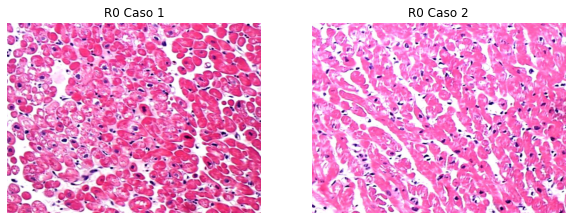

In [ ]:
fig, (ax0,ax1) = plt.subplots(ncols=2, figsize=(10,10))
ax0.imshow(rgb_R0_1, cmap='gray')
ax0.set_title("R0 Caso 1")
ax0.axis('off')

ax1.imshow(rgb_R0_2, cmap='gray')
ax1.set_title("R0 Caso 2")
ax1.axis('off')

print(f"Segundo Momento Angular R0 Caso 1 x Caso 2: {ASM_R01}, {ASM_R02} ")
print(f"Entropia R0 Caso 1 x Caso 2: {Entropy_R01}, {Entropy_R02}")
print(f"Contraste R0 Caso 1 x Caso 2: {Contrast_R01}, {Contrast_R02}")
print(f"Dimensão Fractal R0 Caso 1 x Caso 2 (Com 1ª e 2ª interação): {DF_01}, {DF_02}")

# Calculando Haralick e DF R3 Caso 1

In [ ]:
# Gerando matriz de co-ocorrência
GLCM_R31 = skimage.feature.greycomatrix(gray_R3_1_reshaped,[1],[0])

# Cálculo do Contraste
Contrast_Raw31_ = (skimage.feature.greycoprops(GLCM_R31,'contrast').tolist())
Contrast_Raw31 = Contrast_Raw31_[0]
Contrast_R31 = Contrast_Raw31[0]

# Cálculo do segundo momento angular
ASM_Raw31_ = (skimage.feature.greycoprops(GLCM_R31,'ASM').tolist())
ASM_Raw31 = ASM_Raw31_[0]
ASM_R31 = ASM_Raw31[0]

# Cálculo da Entropia
Entropy_R31 = np.mean(rank.entropy(gray_R3_1_reshaped, gray_R3_1_reshaped))

# Cálculo da Dimensão Fractal por Box Counting
DF_31 = fractal_dimension(gray_R3_1_reshaped)

Feature3 = (ASM_R31, Entropy_R31, Contrast_R31)

# Calculando Haralick e DF R3 Caso 2

In [ ]:
# Gerando matriz de co-ocorrência
GLCM_R32 = skimage.feature.greycomatrix(gray_R3_2_reshaped,[1],[0])

# Cálculo do Contraste
Contrast_Raw32_ = (skimage.feature.greycoprops(GLCM_R32,'contrast').tolist())
Contrast_Raw32 = Contrast_Raw32_[0]
Contrast_R32 = Contrast_Raw32[0]

# Cálculo do segundo momento angular
ASM_Raw32_ = (skimage.feature.greycoprops(GLCM_R32,'ASM').tolist())
ASM_Raw32 = ASM_Raw32_[0]
ASM_R32 = ASM_Raw32[0]

# Cálculo da Entropia
Entropy_R32 = np.mean(rank.entropy(gray_R3_2_reshaped, gray_R3_2_reshaped))

# Cálculo da Dimensão Fractal por Box Counting
DF_32 = fractal_dimension(gray_R3_2_reshaped)

Feature4 = (ASM_R32, Entropy_R32, Contrast_R32)

# Resultados Haralick e DF (R3 Caso 1 e Caso 2)

Segundo Momento Angular R3 Caso 1 x Caso 2: 0.0003366976677320018, 0.000388049073649112 
Entropia R3 Caso 1 x Caso 2: 7.629045388247861, 7.745634219600946
Contraste R3 Caso 1 x Caso 2: 426.5186587400917, 952.0607863996663
Dimensão Fractal R3 Caso 1 x Caso 2 (Com 1ª e 2ª interação): (0.6567239485005791, 2.0, 4.79252918868372), (0.9031571065507773, 2.0, 5.172007621563309)


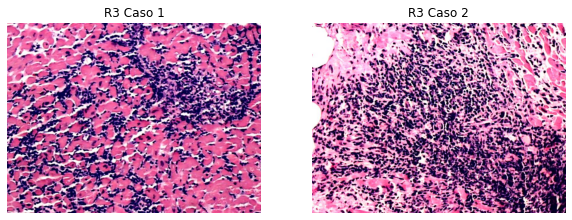

In [ ]:
fig, (ax2,ax3) = plt.subplots(ncols=2, figsize=(10,10))
ax2.imshow(rgb_R3_1, cmap='gray')
ax2.set_title("R3 Caso 1")
ax2.axis('off')

ax3.imshow(rgb_R3_2, cmap='gray')
ax3.set_title("R3 Caso 2")
ax3.axis('off')

print(f"Segundo Momento Angular R3 Caso 1 x Caso 2: {ASM_R31}, {ASM_R32} ")
print(f"Entropia R3 Caso 1 x Caso 2: {Entropy_R31}, {Entropy_R32}")
print(f"Contraste R3 Caso 1 x Caso 2: {Contrast_R31}, {Contrast_R32}")
print(f"Dimensão Fractal R3 Caso 1 x Caso 2 (Com 1ª e 2ª interação): {DF_31}, {DF_32}")

# Plotando comparação Haralick x DF (R0 Caso 1 e 2)

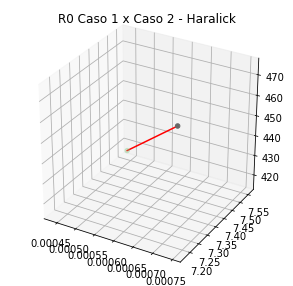

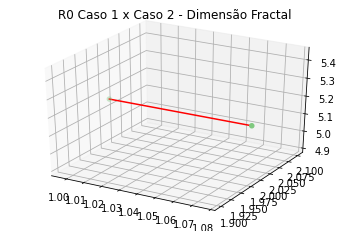

In [ ]:
fig, (ax,bx) = plt.subplots(ncols=2, figsize=(5,5))
ax = plt.axes(projection="3d")
x1=[ASM_R01, ASM_R02]
y1=[Entropy_R01, Entropy_R02]
z1=[Contrast_R01, Contrast_R02]
ax.plot3D(x1, y1, z1, 'red')
ax.scatter3D(x1, y1, z1, c=z1, cmap='Accent');
ax.set_title('R0 Caso 1 x Caso 2 - Haralick')
plt.show()

bx = plt.axes(projection="3d")
x=[DF_01[0], DF_02[0]]
y=[DF_01[1], DF_02[1]]
z=[DF_01[2], DF_02[2]]
bx.plot3D(x, y, z, 'red')
bx.scatter3D(x, y, z, c=z, cmap='Accent');
bx.set_title('R0 Caso 1 x Caso 2 - Dimensão Fractal')
plt.show()

# Plotando comparação Haralick e DF (R3 Caso 1 e 2)

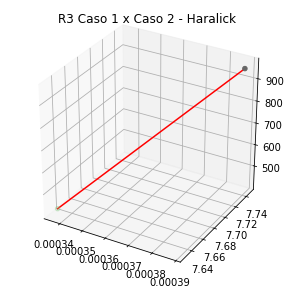

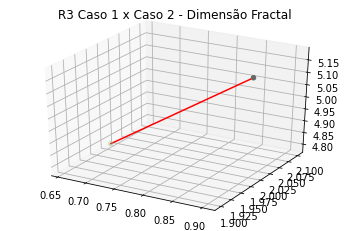

In [ ]:
fig, (ax,bx) = plt.subplots(ncols=2, figsize=(5,5))
ax = plt.axes(projection="3d")
x1=[ASM_R31, ASM_R32]
y1=[Entropy_R31, Entropy_R32]
z1=[Contrast_R31, Contrast_R32]
ax.plot3D(x1, y1, z1, 'red')
ax.scatter3D(x1, y1, z1, c=z1, cmap='Accent');
ax.set_title('R3 Caso 1 x Caso 2 - Haralick')
plt.show()

bx = plt.axes(projection="3d")
x=[DF_31[0], DF_32[0]]
y=[DF_31[1], DF_32[1]]
z=[DF_31[2], DF_32[2]]
bx.plot3D(x, y, z, 'red')
bx.scatter3D(x, y, z, c=z, cmap='Accent');
bx.set_title('R3 Caso 1 x Caso 2 - Dimensão Fractal')
plt.show()

# Referências

https://gogul.dev/software/texture-recognition

https://stackoverflow.com/questions/44793221/python-fractal-box-count-fractal-dimension

https://gist.github.com/viveksck/1110dfca01e4ec2c608515f0d5a5b1d1